## Chances e Acréscimos

### Chances

As **chances a favor** de um evento são a **razão** entre a **probabilidade de ocorrência** e a **probabilidade de não ocorrer**.

**Probabilidade** e **Chances** são **diferentes representações** para a mesma **informações**;

In [1]:
# Probabilidade -> Chances
def Odds(p):
    return p/(1-p)

In [3]:
# Chances -> Probabilidade
def Probability(o):
    return o/(o+1)

# or
def Probability2(yes, no):
    return yes/(yes+no)

### As Chances a partir do teorema de bayes

- A constante de normalização desaparece da equação;
- Reescrevendo a chance em favor de A;

\begin{equation}
    o(A|D) = o(A)\frac{p(D|A)}{p(D|B)}
\end{equation}


- A posteriori é igual a priori vezes a **razão de verossimilhança**;
- Muito usual para se calcular bayes de **cabeça** ou no **papel**; 

### Sangue de Oliver

- Duas pessoas deixaram vestígios de seu próprio sangue na cena do crime;
- Um suspeito, Oliver, é testado e tem sangue tipo 'O';
-  Os grupos sanguíneos dos dois traços são do tipo 'O' (um tipo comum na população local, com frequência de 60%) e do tipo 'AB' (um tipo raro, com frequência de 1%). 

Esses dados, dão evidência a favor da proposição de que Oliver era uma das pessoas?

\begin{equation}
    \frac{o(A|D)}{o(A)} = \frac{p(D|A)}{p(D|B)}
\end{equation}

- 1º termo: Razão entre posteriori e priori;
- 2º termo: Razão de verossimilhança (**fator bayes**)

Fator Bayes > 1: Os dados é mais provável sob A do que de B;
Fotor Bayes < 1: O contrário;

Fotor de Bayes = 1: Os dados são igualmente provável;



### Acréscimo

A **operação fundamental** das estatísticas bayesianas é a **Atualização** , que recebe uma distribuição prévia e um conjunto de dados e produz uma distribuição posterior. Mas existe outras operações:
- Máxima;
- Adição;
- Dimensionamento;
- Mínima;
- Mistura.


Duas maneiras para calcular:
- **Simulação**: Dado um Pmf que representa a distribuição de um único dado, você pode coletar amostras aleatórias, adicioná-las e acumular a distribuição de somas simuladas.
- **Enumeração**: Dados duas Pmfs, você pode enumerar todos os pares possíveis de valores e calcular a distribuição das somas.

In [11]:
from thinkbayes import Pmf, SampleSum
class Die(Pmf):
    def __init__(self, sides):
        super().__init__(self)
        for x in range(1, sides+1):
            self.Set(x, 1)
        self.Normalize()
    

In [12]:
d6 = Die(6)

In [18]:
from thinkplot import Pmf as plt_Pmf, Pmfs as plt_Pmfs, Show
dice = [d6]*3
three = SampleSum(dice, 1000)
three.Print()

3 0.06666666666666668
4 0.06666666666666668
5 0.06666666666666668
6 0.06666666666666668
7 0.06666666666666668
8 0.06666666666666668
9 0.06666666666666668
10 0.06666666666666668
11 0.06666666666666668
12 0.06666666666666668
13 0.06666666666666668
14 0.06666666666666668
15 0.06666666666666668
16 0.06666666666666668
17 0.06666666666666668


- A desvantagem da simulação é que o resultado é apenas aproximadamente correto;

In [14]:
three_exact = d6+d6+d6

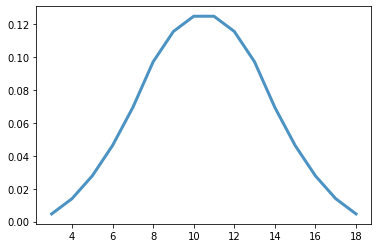

In [7]:
plt_Pmf(three_exact)

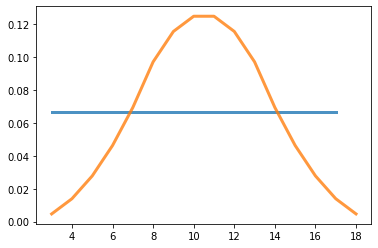

In [21]:
plt_Pmfs([three, three_exact])

### Máxima

Existem três maneiras de calcular a distribuição de máximo:
- **Simulação**: Dada uma Pmf que representa a distribuição para uma única seleção, você pode gerar amostras aleatórias, encontrar o máximo e acumular a distribuição dos máximos simulados;
- **Enumeração**: Dada duas Pmfs, é possível enumerar todos os pares possíveis de valores e calcular a distribuição do máximo;
- **Exponenciação**: Se convertermos uma Pmf em uma Cdf, existe um algoritmo simples e eficiente para encontrar o máximo da Cdf.;

In [6]:
def PmfMax(pmf1, pmf2):
    res = thinkbayes.Pmf()
    for v1, p1 in pmf1.Items():
        for v2, p2 in pmf2.Items():
            res.Incr(max(v1, v2), p1*p2)
    return res

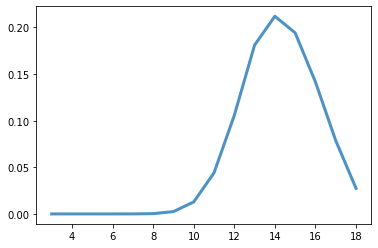

In [20]:
best_attr_cdf = three_exact.Max(6)
best_attr_pmf = best_attr_cdf.MakePmf()
plt_Pmf(best_attr_pmf)

### Misturas

Suponha que eu tenha uma caixa de dados com o seguinte inventário:

- 5 dados de 4 lados
- 4 dados de 6 lados
- 3 dados de 8 lados
- 2 dados de 12 lados
- 1 dado de 20 lados

Eu escolho um dado da caixa e rolo. Qual é a distribuição do resultado?

- Distribuição uniforme com limites [1, n];
- Distribuição resultante é uma mistura de distribuições uniformes com limites diferentes;

In [24]:
d6 = Die(6)
d8 = Die(8)
mix = Pmf()
for die in [d6, d8]:
    for outcome, prob in die.Items():
        mix.Incr(outcome, prob)
mix.Normalize()

1.9999999999999996

In [25]:
pmf_dice = Pmf()
pmf_dice.Set(Die(4), 5)
pmf_dice.Set(Die(6), 4)
pmf_dice.Set(Die(8), 3)
pmf_dice.Set(Die(12), 2)
pmf_dice.Set(Die(20), 1)
pmf_dice.Normalize()

15

In [27]:
mix = Pmf()
for die, weight in pmf_dice.Items():
    for outcome, prob in die.Items():
        mix.Incr(outcome, weight*prob)

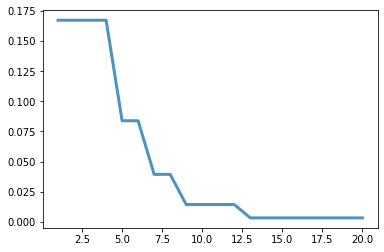

In [28]:
#mix = thinkbayes.MakeMixture(pmf_dice)
plt_Pmf(mix)

### Discussão

-  Uma distribuição é qualquer estrutura de dados que representa um conjunto de valores (possíveis resultados de um processo aleatório) e suas probabilidades.
- A principal diferença entre eles é o desempenho: algumas operações são mais rápidas e fáceis com um Pmf; outros são mais rápidos com um Cdf.
- Introduzir operações que atuam sobre distribuições, como Pmf.__add__, Cdf.Max e thinkbayes.MakeMixture .